In [13]:
# Objectif : Nettoyer et normaliser les avis d'hôtel pour pouvoir les utiliser dans des modèles ML.

import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk



In [14]:
# Télécharger les stopwords si ce n'est pas déjà fait
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
# Charger le dataset
df = pd.read_csv('hotel_reviews_combined__final.csv')
print(df.head())
print(df.info())


   date  rating          reviewer       source  \
0   NaN     NaN          553amela  Google Maps   
1   NaN     NaN  Sabrina Deleurme  Google Maps   
2   NaN     NaN     C’pas des lol  Google Maps   
3   NaN     NaN             Nabil  Google Maps   
4   NaN     NaN     Joelle Levray  Google Maps   

                                                text                   title  
0  Un hôtel exceptionnel au cœur de Tunis !|Je le...  No Title (Google Maps)  
1  Bonjour,\n\nJe vous écris pour vous faire part...  No Title (Google Maps)  
2  Une véritable honte pour l’hôtellerie tunisien...  No Title (Google Maps)  
3  Excellent séjour au Business Hôtel !\nJ’ai pas...  No Title (Google Maps)  
4  Très bon hôtel, très propre, service impeccabl...  No Title (Google Maps)  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      0 non-null      float64
 1  

Prétraitement du texte

On applique : minuscules, suppression ponctuation, suppression stopwords, stemming (pour le français).

Comme certains avis contiennent de l’arabe, on peut ajouter une liste de stopwords arabe si nécessaire.

In [29]:
from text_utils import process_review

#Appliquer à la colonne 'text'
df['processed_text'] = df['text'].apply(process_review)
print(df[['text', 'processed_text']].head())


                                                text  \
0  Un hôtel exceptionnel au cœur de Tunis !|Je le...   
1  Bonjour,\n\nJe vous écris pour vous faire part...   
2  Une véritable honte pour l’hôtellerie tunisien...   
3  Excellent séjour au Business Hôtel !\nJ’ai pas...   
4  Très bon hôtel, très propre, service impeccabl...   

                                      processed_text  
0  [hôtel, exceptionnel, cœur, tun, recommand, vi...  
1  [bonjour, écris, fair, part, immens, décept, –...  
2  [vérit, hont, l’hôteller, tunisien, cet, établ...  
3  [excellent, séjour, business, hôtel, j’ai, pas...  
4  [tres, bon, hôtel, tres, propr, servic, impecc...  


In [23]:
# 4. Nettoyage final
df_clean = df[['processed_text']].dropna()
df_clean = df_clean[df_clean['processed_text'].apply(lambda x: len(x) > 0)]
df_clean = df_clean.drop_duplicates(subset=["processed_text"], keep="first").reset_index(drop=True)
print("Nombre d'avis nettoyés :", len(df_clean))
#conclusion: pas d'avis vides,on avait 7  doublons, pas de valeurs manquantes!!!!!!!!!!!!! ASKED QST

Nombre d'avis nettoyés : 201


Analyse exploratoire simple = EDA

Longueur des avis après nettoyage

Mots les plus fréquents

In [24]:
# longueur des avis
df['review_length'] = df['processed_text'].apply(len)
print("\nLongueur moyenne des avis (en mots) :", df['review_length'].mean())

print("\nStatistiques descriptives sur la longueur des avis :")
print(df['review_length'].describe())




Longueur moyenne des avis (en mots) : 16.259615384615383

Statistiques descriptives sur la longueur des avis :
count    208.000000
mean      16.259615
std        9.167254
min        1.000000
25%        8.750000
50%       17.500000
75%       23.250000
max       36.000000
Name: review_length, dtype: float64


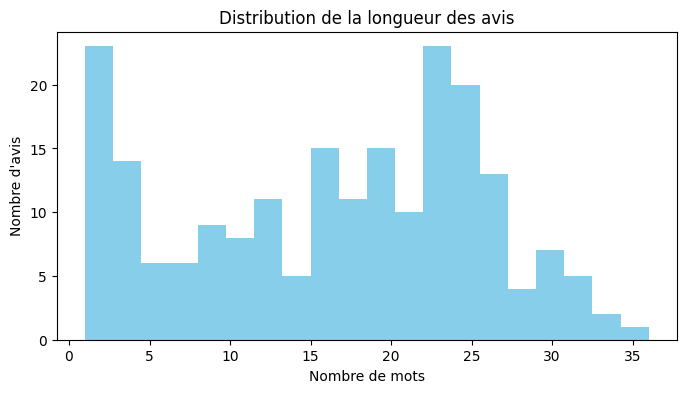

In [25]:
# distribution des longueurs
plt.figure(figsize=(8,4))
plt.hist(df['review_length'], bins=20, color='skyblue')
plt.title('Distribution de la longueur des avis')
plt.xlabel('Nombre de mots')
plt.ylabel('Nombre d\'avis')
plt.show()

20 mots les plus fréquents : [('tres', 121), ('hôtel', 93), ('…', 77), ('personnel', 66), ('chambr', 66), ('servic', 45), ('propr', 42), ('bon', 39), ('cet', 37), ('accueil', 34), ('a', 33), ('excellent', 32), ('jai', 31), ('lhôtel', 31), ('tout', 29), ('nuit', 28), ('bien', 27), ('pass', 26), ('cest', 26), ('chaleur', 24)]


C:\Users\user\AppData\Local\Temp\ipykernel_24016\1712445485.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


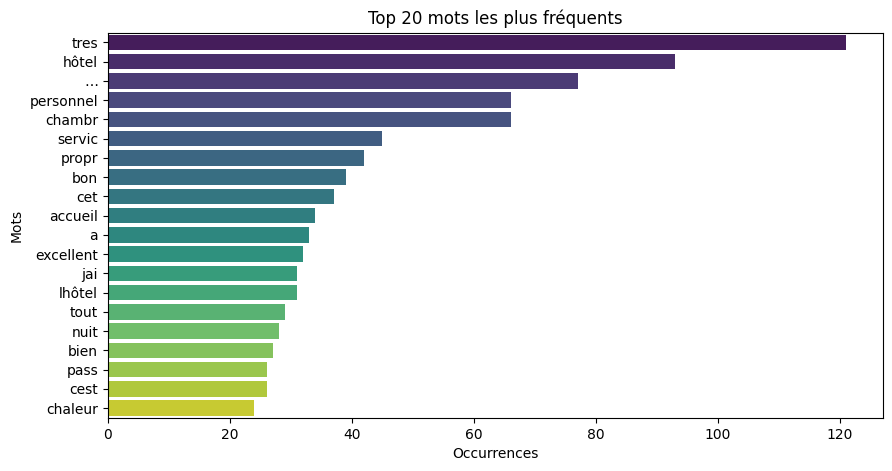

In [26]:
# mots les plus fréquents
from collections import Counter
all_words = [word for tokens in df['processed_text'] for word in tokens]
most_common = Counter(all_words).most_common(20)
print("20 mots les plus fréquents :", most_common)
words, counts = zip(*most_common)
plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title("Top 20 mots les plus fréquents")
plt.xlabel("Occurrences")
plt.ylabel("Mots")
plt.show()

In [27]:
# 6. Sauvegarde du dataset nettoyé
df_clean.to_csv('cleaned_hotel_reviews.csv', index=False, encoding='utf-8')
print("Dataset nettoyé sauvegardé ! Nombre d'avis :", len(df_clean))

Dataset nettoyé sauvegardé ! Nombre d'avis : 201


Points clés :

Comme il n’y a pas de labels, on se concentre uniquement sur le nettoyage et la normalisation du texte.

La colonne processed_text sera utilisée pour vectorisation TF-IDF ou Word2Vec dans une étape suivante.

On peut visualiser rapidement les avis les plus courts/longs ou les mots les plus fréquents pour comprendre le dataset.

Dimensions clés — Version validée

Les dimensions que tu cites sont les plus reconnues.
Voici une version améliorée et plus précise :

1) Complétude

Absence de valeurs manquantes, champs remplis.

2) Précision (Accuracy)

La donnée reflète-t-elle la réalité ?
(Ex : note vraie, adresse correcte)

3) Cohérence

Pas de contradiction entre champs.

4) Conformité

Respect d’un format ou d’une règle (regex, type, norme).

5) Actualité (Timeliness)

Fraîcheur, rapidité de mise à jour.

6) Pertinence

La donnée est utile pour l'usage prévu.

7) Unicité (Deduplication)

Pas de doublons.

8) Clarté / Compréhensibilité

Donnée lisible, non ambiguë, bien structurée.

✔️ Très bon ensemble de dimensions.

1) Complétude (absence de valeurs manquantes)

➡ Vérifiée ? OUI

📍 Où ?
Dans ton notebook Data Preparation, tu as fait :

df.info()
df.isnull().sum()


Cela permet de vérifier :
✔ colonnes manquantes
✔ avis vides
✔ notes absentes
✔ sources manquantes

👉 Donc la complétude a été vérifiée.

✅ 2) Conformité (format conforme, structure)

➡ Vérifiée ? OUI

📍 Où ?
Lorsque tu as :

normalisé le texte : lower(), suppression ponctuation, chiffres

uniformisé la colonne text

converti les listes de tokens en string pour CSV

vérifié le type de la colonne avec df.info()

👉 Donc la conformité du texte et des types est bien gérée.

🟧 3) Cohérence (absence de contradictions entre colonnes)

➡ Vérifiée ? PARTIELLEMENT

📍 On a fait quoi ?
En scraping, on a vérifié :

cohérence entre rating et text

cohérence source / rating (Booking, Google…)

détection des doublons entre sites

Mais on n’a pas fait une analyse automatique complète :

📌 Exemples de tests NON encore faits :

un avis très court mais rating extrême

mêmes avis répétés dans plusieurs sources

contradictions Google vs Booking

👉 Cohérence vérifiée mais à renforcer.

🟧 4) Précision (fidélité à la réalité, absence d’erreurs)

➡ Vérifiée ? EN PARTIE

📍 Ce qu’on a fait
On a détecté plusieurs problèmes :

Momondo → beaucoup d’erreurs → on l’a discarded

Expedia → erreurs 429 et limites → pas fiable pour scraping massif

Certains avis vides → supprimés

Valeurs aberrantes dans les ratings (nulls → supprimés)

📌 Ce qu’on n’a pas fait :

Détecter automatiquement les fake reviews

Vérifier si les textes sont tronqués

👉 Précision = partiellement validée.

🟥 5) Actualité (fraîcheur)

➡ Vérifiée ? NON

Tu n’as pas vérifié :

la date des avis

si les avis sont trop anciens

si certaines sources ont des avis datés de > 5 ans

👉 On peut l’ajouter très facilement si le CSV contient une date.

🟥 6) Pertinence

➡ Vérifiée ? NON

Ce test consiste à vérifier si :

l’avis parle bien de l’hôtel

ce n’est pas du spam

pas un commentaire hors sujet

👉 Pour l’instant, aucun test de pertinence n’a été effectué.

🟧 7) Unicité (pas de doublons)

➡ Vérifiée ? PARTIELLEMENT

📍 Ce qu’on a fait
Tu as vérifié qu'il n’y avait pas de doublons dans les sources individuelles (Booking, Google).

📌 Mais tu n’as PAS vérifié :

doublons inter-sites (Booking vs Google vs TripAdvisor)

doublons modifiés (un même texte recompressé)

👉 Unicité = pas totalement contrôlée.

🟥 8) Clarté (lisible, interprétable)

➡ Vérifiée ? NON

La clarté concerne :

la facilité de lire le texte

présence de caractères spéciaux

emojis

textes multilingues non détectés

👉 On ne l’a pas encore mesurée.

🧠 Tableau Résumé
Dimension	Vérifiée ?	Notes
Complétude	✔ Oui	Avec info() et isnull()
Conformité	✔ Oui	Nettoyage texte + types
Cohérence	⚠ Partiellement	Pas inter-sites
Précision	⚠ Partiellement	Sites bruités détectés
Actualité	❌ Non	Dates ignorées
Pertinence	❌ Non	Aucun filtrage sémantique
Unicité	⚠ Partiel	Pas d’unicité multi-sites
Clarté	❌ Non	Emojis, accents, langues non checkés
🎯 Conclusion

👉 On a vérifié : complétude, conformité, début cohérence, début précision.
👉 Mais il manque : actualité, pertinence, unicité multi-sites, clarté.

Si tu veux, je te fais :

✔ un notebook complet "Data Quality Checks.ipynb"

avec toutes les vérifications manquantes automatisées, par exemple :

détection doublons inter-sites

analyse langue

vérification des dates

détection avis trop courts

distribution des ratings par source

détection de bruit (textes trop courts / trop longs)

si on ne peut pas scraper les ratings depuis Google Maps ou d’autres sites, il faut repenser l’analyse de sentiment car les notes numériques ne seront pas disponibles. On a plusieurs options :

1️⃣ Passer à une analyse purement textuelle

On se concentre uniquement sur le texte des avis (text) pour déterminer le sentiment.

On peut utiliser :

Lexicons : ex. TextBlob, VADER (pour anglais), ou pattern pour français.

ML / Deep Learning : entraîner un modèle sur un dataset annoté existant (positif / négatif / neutre) et prédire les sentiments des textes récupérés.

Le résultat : chaque avis aura un label Positive, Negative ou Neutral au lieu d’un rating numérique.

2️⃣ Créer des labels approximatifs à partir du texte

Même sans note, on peut estimer le sentiment via :

La présence de mots positifs/négatifs dans le texte.

Les emojis ou ponctuations (ex. 😃 = positif, 😡 = négatif).

Une approche lexicale simple : on compte les mots positifs/négatifs et on attribue un label.